In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

import warnings
warnings.filterwarnings("ignore")

In [3]:
image_raw = imread("duck.jpeg")
print(image_raw.shape)


(130, 196, 3)


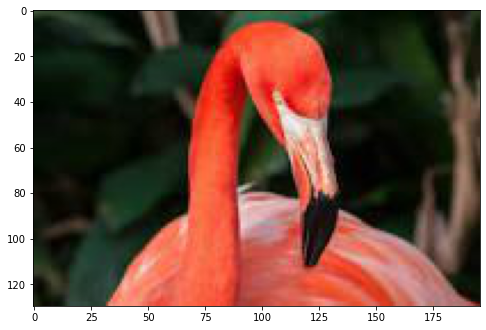

In [5]:
#Display the Image
plt.figure(figsize=[8,8])
plt.imshow(image_raw)

Converting to greyscale -

1) summing RGBs channel values for each pixel

2) capping values to 1

We'll plot the matrix as a greyscale image.

In [6]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

(130, 196)


In [7]:
image_bw = image_sum/image_sum.max()
print(image_bw.max())

1.0


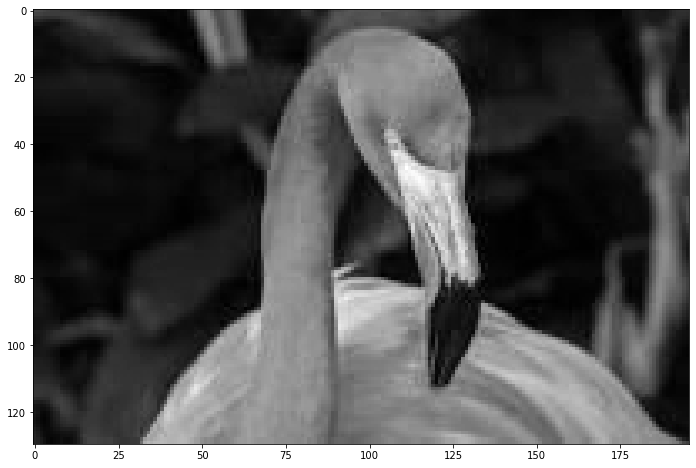

In [8]:
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Performing PCA on the image

-> We'll perform PCA on the matrix with all the components

-> We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture

-> We'll pick a suitable number of components to represent the image for compression






In [9]:
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()

pca.fit(image_bw)

PCA()

In [10]:
#Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

In [11]:
#How many PCS expalin 95% of the variance

k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))

Number of components explaining 95% variance: 10


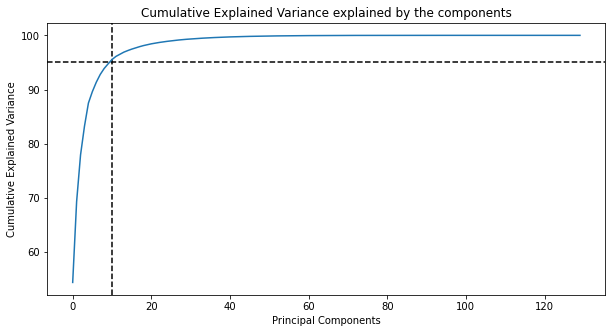

In [12]:
plt.figure(figsize=[10,5])
plt.title("Cumulative Explained Variance explained by the components")
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Principal Components")
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="k", linestyle="--")
ax = plt.plot(var_cumu)

Reconstructing the b/w image with the limited number of components 38

First, we'll use the fit_transform method from the IncrementalPCA module to first find the 38 PCs and transform and represent the data in those 38 new components/columns.

Next, we'll reconstruct the original matrix from these 38 components using the inverse_transform method.



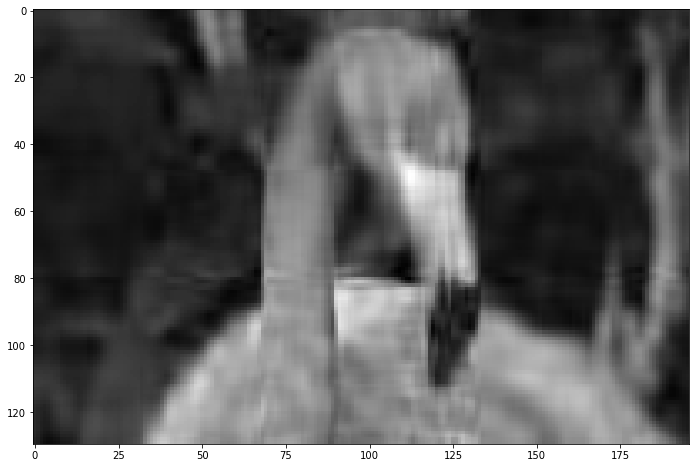

In [13]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

#plotting the reconsturcted image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap=plt.cm.gray)

In [14]:
#let's try out a different value of k-150 components

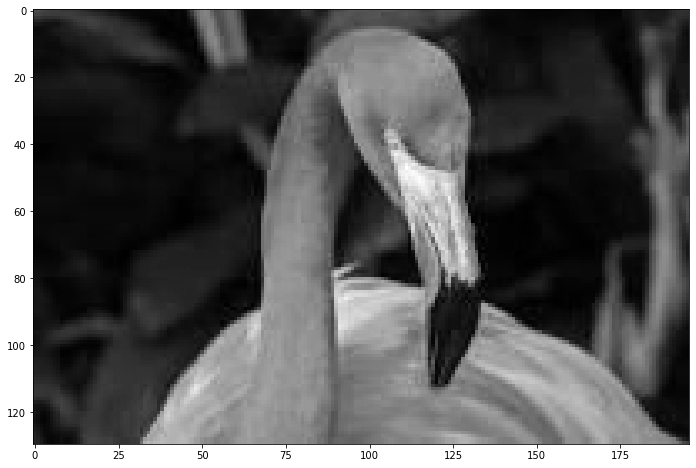

In [16]:
#function to reconstruct and plot image for a given number of components

def plt_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon, cmap=plt.cm.gray)

k=150
plt.figure(figsize=([12,8]))
plt_at_k(100)

Reconstructing and plotting for different number of components

we'll try out different number of components, begining from 10, ending at 250

we'll reconstruct the image at each k and plot the images

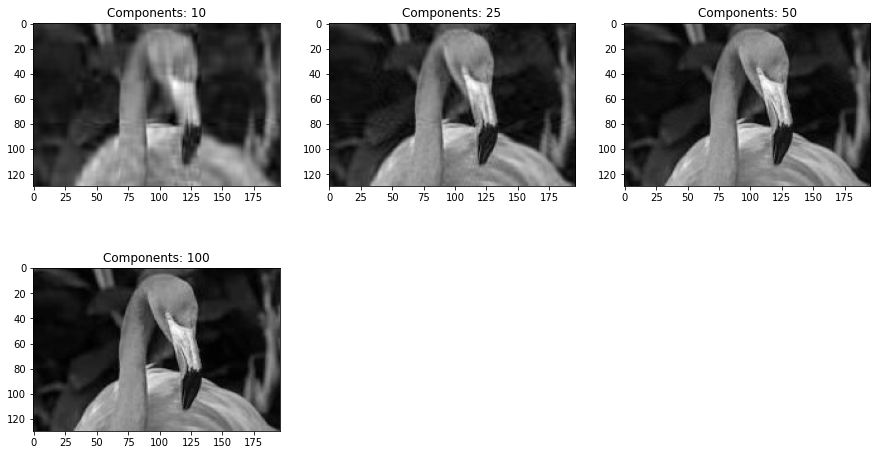

In [21]:
#setting different amount of k

ks = [10,25,50,100]

plt.figure(figsize=[15,9])

for i in range(4):
    plt.subplot(2,3,i+1)
    plt_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))
    
plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()